In [1]:
import illustris_python as il
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d
from matplotlib import rcParams
from matplotlib.patches import Ellipse,Annulus,Arc,PathPatch
plt.rc('text', usetex=True)
rcParams.update({'axes.linewidth': 1.5})
rcParams.update({'xtick.direction': 'in'})
rcParams.update({'ytick.direction': 'in'})
rcParams.update({'xtick.minor.visible': 'True'})
rcParams.update({'ytick.minor.visible': 'True'})
rcParams.update({'xtick.major.pad': '7.0'})
rcParams.update({'xtick.major.size': '8.0'})
rcParams.update({'xtick.major.width': '1.5'})
rcParams.update({'xtick.minor.pad': '7.0'})
rcParams.update({'xtick.minor.size': '4.0'})
rcParams.update({'xtick.minor.width': '1.5'})
rcParams.update({'ytick.major.pad': '7.0'})
rcParams.update({'ytick.major.size': '8.0'})
rcParams.update({'ytick.major.width': '1.5'})
rcParams.update({'ytick.minor.pad': '7.0'})
rcParams.update({'ytick.minor.size': '4.0'})
rcParams.update({'ytick.minor.width': '1.5'})
rcParams.update({'axes.titlepad': '10.0'})
rcParams.update({'font.size': 35})

In [3]:
basePath = '../sims.TNG/TNG100-1/output/'

In [4]:
df = pd.read_csv(r'tng_snap.csv')
age_tab=np.asarray(df['age'])
z_tab=np.asarray(df['redshift'])

In [79]:
def stellar_halo_metal_map(haloID,snap,npixel,phy_scale):
    star=il.snapshot.loadHalo(basePath, snap, haloID, 4, fields=['GFM_Metals','Coordinates'])
    halo=il.groupcat.loadSingle(basePath, snap, haloID=haloID)
    x = -(star['Coordinates'][:,0] - halo['GroupPos'][0])/(1+z_tab[snap])/0.6774
    y = (star['Coordinates'][:,1] - halo['GroupPos'][1])/(1+z_tab[snap])/0.6774
    nPixels = [npixel,npixel]
    minMax = [-phy_scale, phy_scale]
    grid_temp_tab=[[],]
    for i in range(10):
        grid_temp, _, _, _ = binned_statistic_2d(x, y, star['GFM_Metals'][:,i], 'mean', bins=nPixels, range=[minMax,minMax])
        grid_temp_tab.append(grid_temp)
    del grid_temp_tab[0]
    return grid_temp_tab

In [80]:
def stellar_subhalo_metal_map(haloID,snap,npixel,phy_scale):
    halo=il.groupcat.loadSingle(basePath, snap, haloID=haloID)
    subID=halo['GroupFirstSub']
    star=il.snapshot.loadSubhalo(basePath, snap, subID, 4, fields=['GFM_Metals','Coordinates'])
    x = -(star['Coordinates'][:,0] - halo['GroupPos'][0])/(1+z_tab[snap])/0.6774
    y = (star['Coordinates'][:,1] - halo['GroupPos'][1])/(1+z_tab[snap])/0.6774
    nPixels = [npixel,npixel]
    minMax = [-phy_scale, phy_scale]
    grid_temp_tab=[[],]
    for i in range(10):
        grid_temp, _, _, _ = binned_statistic_2d(x, y, star['GFM_Metals'][:,i], 'mean', bins=nPixels, range=[minMax,minMax])
        grid_temp_tab.append(grid_temp)
    del grid_temp_tab[0]
    return grid_temp_tab

In [19]:
with open('galaxies_tng100_072_central_HaloID.txt','rb') as f:
    tng100_HaloID=pickle.load(f)

In [108]:
grid_temp_tab=stellar_subhalo_metal_map(tng100_HaloID[0],72,1000,500)

In [11]:
star=il.snapshot.loadHalo(basePath, 72, tng100_HaloID[0], 4, fields=['GFM_Metals','Coordinates'])

In [17]:
star['GFM_Metals']

array([[6.1246306e-01, 3.1105646e-01, 9.3253274e-03, ..., 3.3690271e-03,
        5.1456029e-03, 2.4406130e-03],
       [6.1518770e-01, 3.0478567e-01, 1.0256979e-02, ..., 3.2515544e-03,
        3.5917326e-03, 1.9102184e-03],
       [6.5323693e-01, 2.8799030e-01, 7.2191819e-03, ..., 2.3302159e-03,
        2.6797291e-03, 1.3924242e-03],
       ...,
       [7.3535103e-01, 2.5591427e-01, 9.3866122e-04, ..., 3.7489293e-04,
        4.2407450e-04, 2.3223247e-04],
       [7.0868760e-01, 2.7234840e-01, 2.0748728e-03, ..., 8.4132730e-04,
        1.2090597e-03, 5.9507287e-04],
       [7.3472798e-01, 2.5623167e-01, 9.9014328e-04, ..., 3.8508960e-04,
        4.4902723e-04, 2.4151155e-04]], dtype=float32)

Text(0, 0.5, '$\\Delta$y [kpc]')

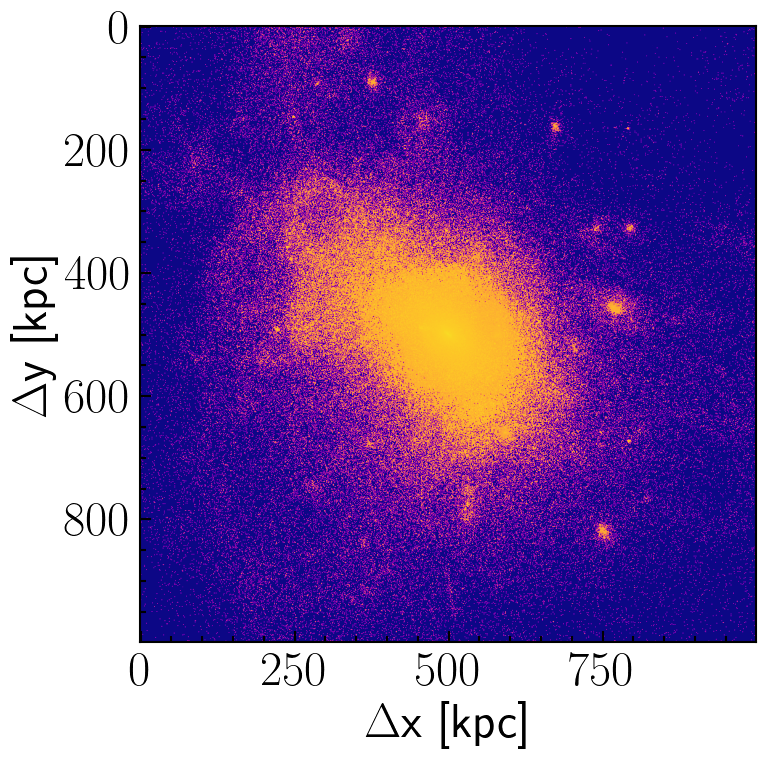

In [93]:


map_data=grid_temp_tab[6]
map_data[np.where(~(map_data>0))]=0


Text(0, 0.5, '$\\Delta$y [kpc]')

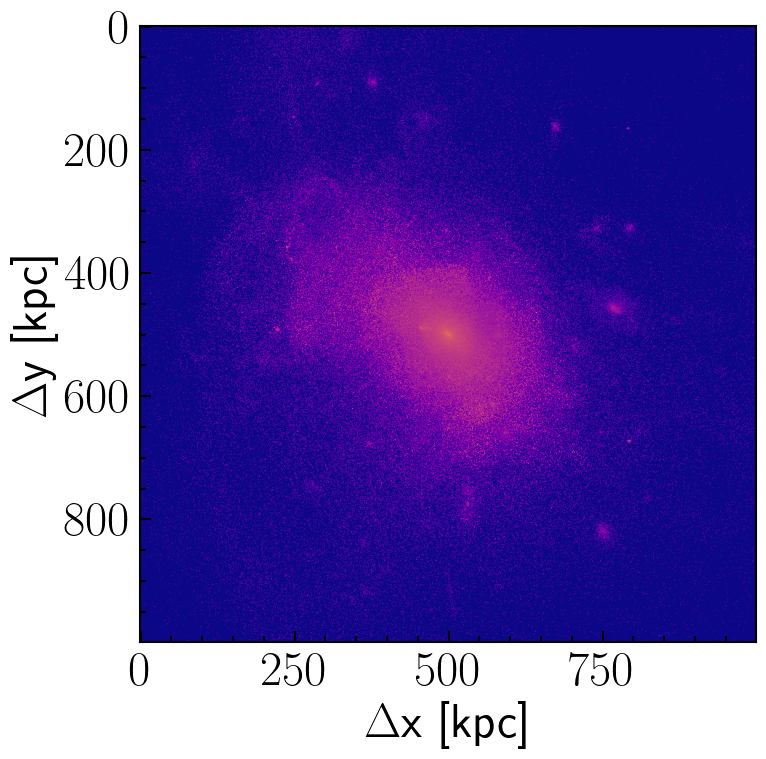

In [103]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
map_min = map_data[map_data > 0.0].min()
min_value=0.01
norm_factor=map_min/min_value
map_norm=map_data/norm_factor
plt.imshow(map_norm**0.5, cmap='plasma',aspect=1)
ax.autoscale(False)
ax.set_xlabel('$\Delta$x [kpc]')
ax.set_ylabel('$\Delta$y [kpc]')

Text(0, 0.5, '$\\Delta$y [kpc]')

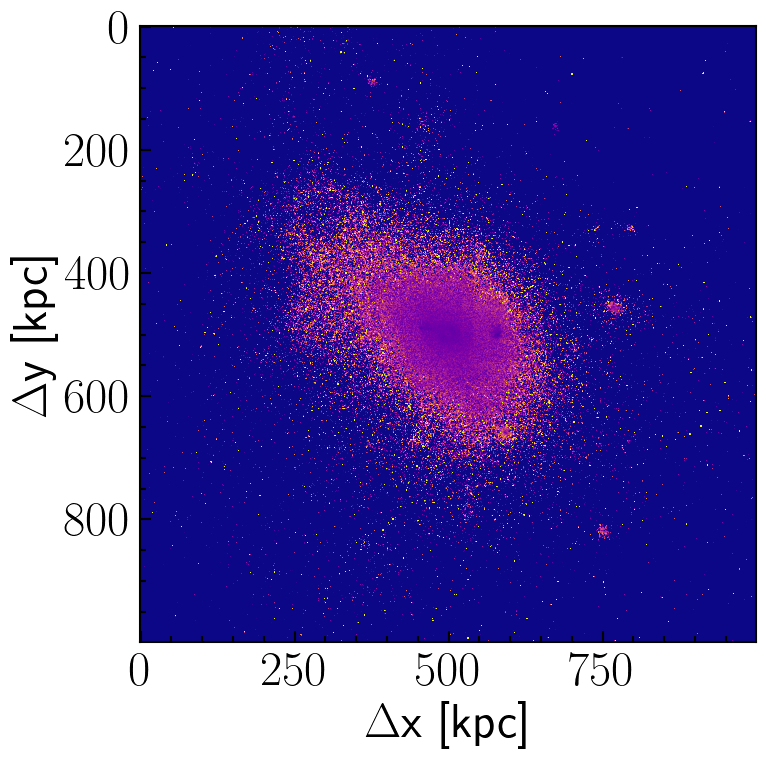

In [107]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

map_data=grid_temp_tab[6]/grid_temp_tab[8]
map_data[np.where(~(map_data>0))]=0
map_min = map_data[map_data > 0.0].min()
min_value=0.01
norm_factor=map_min/min_value
map_norm=map_data/norm_factor
plt.imshow(map_norm, cmap='plasma',aspect=1,vmin=0.65,vmax=1.25)
ax.autoscale(False)
ax.set_xlabel('$\Delta$x [kpc]')
ax.set_ylabel('$\Delta$y [kpc]')

(array([1.0000e+00, 3.0000e+00, 4.0000e+00, 1.9000e+01, 2.5500e+02,
        3.5310e+03, 1.7241e+04, 4.1307e+04, 4.8171e+04, 3.3023e+04,
        2.3366e+04, 1.6826e+04, 1.1373e+04, 7.5280e+03, 5.2380e+03,
        3.5940e+03, 2.5530e+03, 1.8850e+03, 1.4240e+03, 1.0390e+03,
        7.6300e+02, 5.8700e+02, 5.1800e+02, 3.5600e+02, 3.2100e+02,
        2.2300e+02, 2.0600e+02, 1.9500e+02, 1.5700e+02, 1.5300e+02]),
 array([0.01      , 0.10964562, 0.20929125, 0.30893687, 0.4085825 ,
        0.50822812, 0.60787375, 0.70751937, 0.807165  , 0.90681062,
        1.00645625, 1.10610187, 1.20574749, 1.30539312, 1.40503874,
        1.50468437, 1.60432999, 1.70397562, 1.80362124, 1.90326687,
        2.00291249, 2.10255812, 2.20220374, 2.30184936, 2.40149499,
        2.50114061, 2.60078624, 2.70043186, 2.80007749, 2.89972311,
        2.99936874]),
 <BarContainer object of 30 artists>)

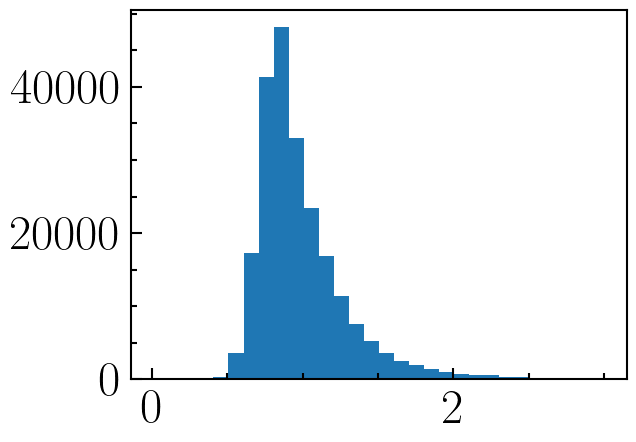

In [84]:
plt.hist(map_norm[(map_norm>0)&(map_norm<3)],bins=30)

In [85]:
grid_temp_tab[6]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [99]:
np.max(map_norm)

497898.50520640233